#### XGBoost in Pythin, From Start to Finish (Customer Churn)

##### WE WILL LEARN...

##### IMPORT THE MODULE THAT WILL DO ALL THE WORK

In [1]:
import pandas as pd                                                                   # Load & Manipulate Data and for ONEHOT ENCODING
import numpy as np                                                                    # Calculate the MEAN & STANDARD DEVIATION
import xgboost as xgb                                                                 # XGBoost Module
from sklearn.model_selection import train_test_split                                  # Split Data into TRAINING & TESTING Set.
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer       # For Scoring during
from sklearn.model_selection import GridSearchCV                                      # For CROSS-VALIDATION
from sklearn.metrics import confusion_matrix                                          # Creates a CONFUSION MATRIX
from sklearn.metrics import plot_confusion_matrix                                     # Draws a CONFUSION MATRIX

##### IMPORT DATASET

###### SET WORKING DIRECTORY

In [2]:
import os
os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\datasets')

###### IMPORT DATASET

In [3]:
df = pd.read_csv('Telco_customer_churn.csv')

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
df.shape

(7043, 33)

In [7]:
df.drop(['Churn Label',
         'Churn Score',
         'CLTV',
         'Churn Reason'],
       axis = 1,
       inplace = True)                     # Set axis = 0  to Remove Rows and axis = 1 to remove columns.

In [8]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [9]:
df['Count'].unique()

array([1], dtype=int64)

In [10]:
df['Country'].unique()

array(['United States'], dtype=object)

In [11]:
df['State'].unique()

array(['California'], dtype=object)

In [12]:
df.drop(['Count',
         'CustomerID',
         'Country',
         'State',
        'Lat Long'],
       axis = 1,
       inplace = True)

In [13]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


##### SPECIAL NOTE:

In [14]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [15]:
df['City'].replace(' ', '_', regex = True, inplace = True)

In [16]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [17]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


##### MISSING DATA PART 1: IDENTIFYING MISSING DATA

In [18]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [19]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

##### MISSING DATA PART 2: DEALING WITH MISSING DATA, XGBoost STYLE

In [21]:
len(df.loc[df['Total_Charges'] == ' '])

11

In [22]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [23]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [24]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [25]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [26]:
df.replace(' ', '_', regex = True, inplace = True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


##### FORMAT DATA PART 1: SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [27]:
X = df.drop('Churn_Value', axis = 1).copy()     # Alternatively: X = df_no_missing.iloc[:, :-1]
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [28]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

##### FORMAT THE DATA PART 2: ONE-HOT-ENCODING

In [29]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [30]:
pd.get_dummies(X, columns = ['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,0,0,1,0
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,0,0,1,0
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,1,0,0,0


In [31]:
X.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges'],
      dtype='object')

In [32]:
X_encoded = pd.get_dummies(X, columns = ['City',
                                        'Gender',
                                        'Senior_Citizen',
                                        'Partner',
                                        'Dependents',
                                        'Phone_Service',
                                        'Multiple_Lines',
                                        'Internet_Service',
                                        'Online_Security',
                                        'Online_Backup',
                                        'Device_Protection',
                                        'Tech_Support',
                                        'Streaming_TV',
                                        'Streaming_Movies',
                                        'Contract',
                                        'Paperless_Billing',
                                        'Payment_Method'])

In [33]:
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [34]:
print('Dataset Size after Encoding', X_encoded.shape)
print('Dataset Size before Encoding', X.shape)

Dataset Size after Encoding (7043, 1178)
Dataset Size before Encoding (7043, 23)


In [35]:
y.unique()

array([1, 0], dtype=int64)

##### BUILD A PRELIMINARY XGBOOST MODEL

In [36]:
sum(y) / len(y)

0.2653698707936959

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,
                                                    y,
                                                    random_state = 42,
                                                    stratify = y)

In [38]:
sum(y_train) / len(y_train)

0.2654297614539947

In [39]:
sum(y_test) / len(y_test)

0.26519023282226006

##### CREATE AN XGBoost INSTANCE

In [40]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',
                           missing = None,
                           seed = 42)

##### FIT OUR MODEL ON TRAINING & TESTING SETS

In [41]:
clf_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65051
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683
[21]	validation_0-aucpr:0.65707


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

##### BUILT A CONFUSION MATRIX PLOT

In [42]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ["Did not leave", "Left"])

##### OPTIMIZE PARAMETERS USING CROSS VALIDATION AND GRIDSEARCH()

In [43]:
# ROUND 1
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}

In [44]:
# ROUND 2
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [3]
}

In [45]:
optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic',
    seed = 42,
    subsample = 0.9,
    colsample_bytree = 0.5),
param_grid = param_grid,
scoring = 'roc_auc',
verbose = 0,
n_jobs = 10,
cv = 3
)

In [46]:
optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set = [(X_test, y_test)],
                  verbose = False)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=0.9, tree_metho

In [47]:
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


##### BUILDING, EVALUTING, DRAWING AND INTERPRETING THE OPTIMIZED XGBOOST MODEL

In [48]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5
                           )

In [49]:
clf_xgb.fit(X_train,
           y_train,
           verbose = True,
           early_stopping_rounds = 10,
           eval_metric = 'aucpr',
           eval_set = [(X_test, y_test)])

[20:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.56622
[1]	validation_0-aucpr:0.59633
[2]	validation_0-aucpr:0.62538
[3]	validation_0-aucpr:0.63059
[4]	validation_0-aucpr:0.63626
[5]	validation_0-aucpr:0.64668
[6]	validation_0-aucpr:0.64032
[7]	validation_0-aucpr:0.64428
[8]	validation_0-aucpr:0.64448
[9]	validation_0-aucpr:0.65640
[10]	validation_0-aucpr:0.65543
[11]	validation_0-aucpr:0.66453
[12]	validation_0-aucpr:0.66361
[13]	validation_0-aucpr:0.66424
[14]	validation_0-aucpr:0.66289
[15]	validation_0-aucpr:0.66315
[16]	validation_0-aucpr:0.66231
[17]	validation_0-aucpr:0.66141
[18]	validation_0-aucpr:0.66036
[19]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

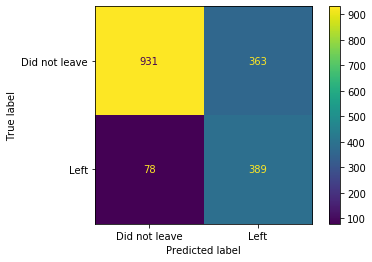

In [50]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not leave', 'Left'])

In [51]:
clf_xgb = xgb.XGBClassifier(seed = 42,
                            objective = 'binary:logistic',
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5,
                            n_estimators = 1
                           )
# We set n_estimators to 1 so we can get gain, cover, etc.

In [52]:
clf_xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1, n_jobs=4,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
bst = clf_xgb.get_booster()

for importance_type in ('weight',
                        'gain',
                        'cover',
                        'total_gain',
                        'total_cover'):
    print('%s: ' % importance_type, 
          bst.get_score(importance_type = importance_type))
node_params = {'shape': 'box',  # make the nodes fancy
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box',
              'style': 'filled',
              'fillcolor': '#e48038'}

weight:  {'Tech_Support_No': 1, 'Contract_Two_year': 1, 'Internet_Service_Fiber_optic': 1, 'Tenure_Months': 5, 'Monthly_Charges': 2, 'Latitude': 1, 'Internet_Service_DSL': 2, 'Contract_One_year': 1, 'Senior_Citizen_No': 1}
gain:  {'Tech_Support_No': 1133.81055, 'Contract_Two_year': 252.511536, 'Internet_Service_Fiber_optic': 134.158798, 'Tenure_Months': 112.87569578000003, 'Monthly_Charges': 13.62578015, 'Latitude': 6.79351807, 'Internet_Service_DSL': 85.56891250000001, 'Contract_One_year': 13.2877808, 'Senior_Citizen_No': 14.3072205}
cover:  {'Tech_Support_No': 1820.25, 'Contract_Two_year': 742.75, 'Internet_Service_Fiber_optic': 484.0, 'Tenure_Months': 413.95, 'Monthly_Charges': 148.875, 'Latitude': 219.75, 'Internet_Service_DSL': 538.75, 'Contract_One_year': 470.5, 'Senior_Citizen_No': 98.75}
total_gain:  {'Tech_Support_No': 1133.81055, 'Contract_Two_year': 252.511536, 'Internet_Service_Fiber_optic': 134.158798, 'Tenure_Months': 564.3784789000001, 'Monthly_Charges': 27.2515603, 'Lat

In [54]:
# In case if graphviz is not installed, please try below methods to install...
from sklearn.tree import plot_tree
!pip install graphviz
conda install graphviz
!pip install graphviz python-graphviz
# If you get an error, path not found then follow below method...
# Locate your graphviz folder can be on this location...C:\ProgramData\Anaconda3\Library\bin\graphviz
# copy this path...
# go to control panel --> Security and Maintenance --> System --> Advnaced System Setting-left-side --> 
# click Enviornment Variable under Advanced --> click Path --> click Edit --> click New --> paste the path we copied --> 
# Press ok --> ok
# Restart your Kernel and hopefully it must work now.

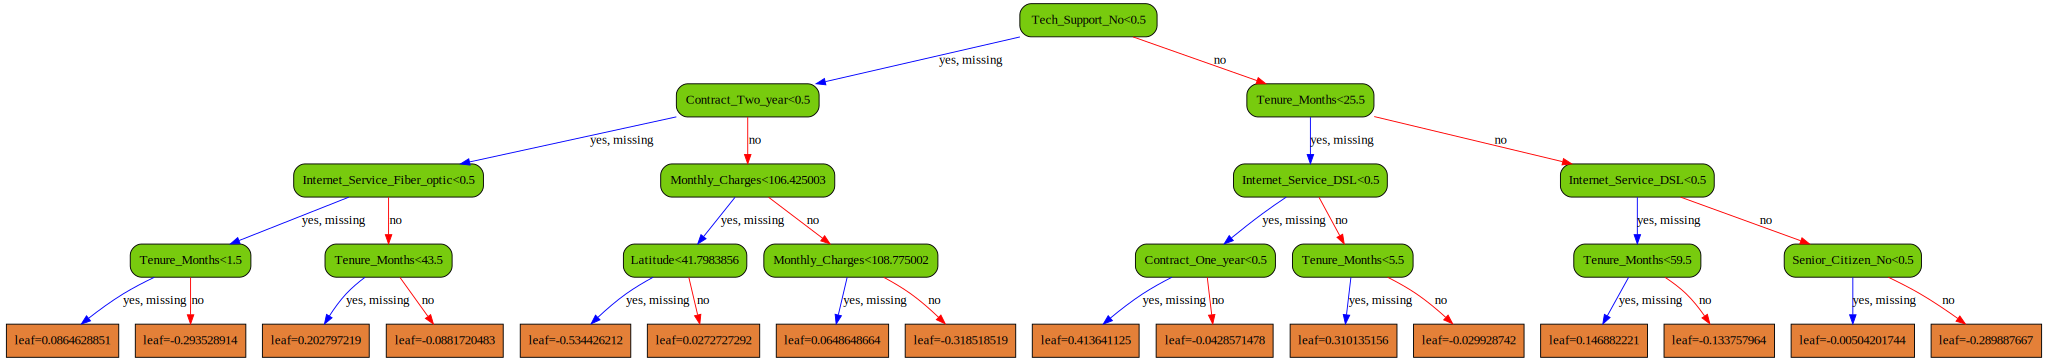

In [58]:
xgb.to_graphviz(clf_xgb,
               num_trees = 0,
               size = "5,5",
               condition_node_params = node_params,
               leaf_node_params = leaf_params)

In [59]:
graph_data = xgb.to_graphviz(clf_xgb,
                            num_trees = 0,
                            size = '10,10',
                            condition_node_params = node_params,
                            leaf_node_params = leaf_params)
graph_data.view(filename = 'xgboost_telco_customer_churn')  # save as PDF

'xgboost_telco_customer_churn.pdf'

##### IN COLCLUSION WE...

   ###### >> LOADED the Data from a file.
   ###### >> Identified and Dealt with MISSING DATA
   ###### >> Formatted the Data for XGBoost using ONE_HOT_ENCODING
   ###### >> Built an XGBOOST MODEL for Classification
   ###### >> Optimize the XGBoost Parameters with Cross Validation and GridSearch()
   ###### >> Built, Drew, Interpreted and Evaluated the Optimized XGBoost Model